<a href="https://colab.research.google.com/github/nkale882/AML_Practicals-/blob/main/AML_p_1_K_Means_Clus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

**What Each Library Does:**
1. **matplotlib.pyplot:** Used for data visualization (plotting graphs).
2. **sklearn.datasets.make_blobs**: Used to generate synthetic clustered data (useful for testing clustering algorithms like k-means or agglomerative clustering).
3. **pandas:** Used for data manipulation and analysis (working with DataFrames).
4. **numpy:** Used for numerical computations (arrays, matrices, etc.).

In [ ]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=23)

**make_blobs Function**
make_blobs() is a function from sklearn.datasets that generates a synthetic dataset with clusters of data points.It's useful for testing clustering algorithms like k-means or hierarchical clustering.

**Parameters Explanation**
1. **n_samples=1000**	 : Generates 1000 data points.
2. **centers=3** :Creates 3 clusters (groups) of points.
3. **n_features=2** :	Each data point has 2 features (x, y coordinates), making it a 2D dataset.
4. **random_state=23** : Ensures the same random dataset is generated every time the code runs (for reproducibility).

**X:** A NumPy array of shape (1000, 2), containing 1000 points in 2D space.
**y:** A NumPy array of shape (1000,), containing the cluster labels (0, 1, or 2) for each point.

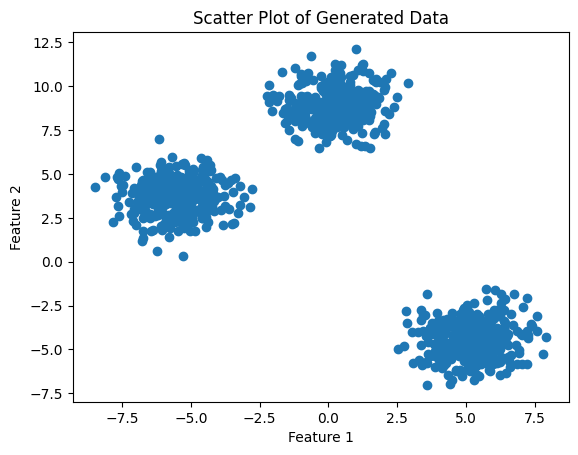

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.title("Scatter Plot of Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

1. **X[:, 0]** → Extracts Feature 1 (X-coordinates)

*   X is a NumPy array with shape (1000, 2), meaning it has 1000 rows (data points)

*   X[:, 0] selects all rows (:) but only the first column (0), which represents the x-coordinates.

2. **X[:, 1]** → Extracts Feature 2 (Y-coordinates)


*   X[:, 1] selects all rows but only the second column, which represents the y-coordinates.

3. **plt.scatter(X[:, 0], X[:, 1])**


*   Creates a scatter plot where:

*   The x-axis values are from X[:, 0] (Feature 1).

*   The y-axis values are from X[:, 1] (Feature 2).









In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.30, random_state=42)



*   train_test_split is a function from sklearn.model_selection that splits a dataset into training and testing sets.
*   This is commonly used in machine learning to train a model on one part of the data (training set) and evaluate it on another (test set).

**Parameters Explained**


1.   **X** : Feature matrix (input data) containing coordinates (from make_blobs).
2.   **y** : Target labels (cluster labels from make_blobs).
3.   **test_size=0.30** : 30% of the data (about 300 out of 1000 points) will be used for testing, and 70% for training.
4.  **random_state=42**  :	Ensures the split is reproducible (so we get the same split every time the code runs).




In [ ]:
X.shape

(1000, 2)

In [ ]:
print(X_train)

[[-0.71740326  8.97390591]
 [ 6.65825571 -3.00623069]
 [-0.1366018  10.18386256]
 ...
 [ 2.54487099 -4.98136265]
 [-4.97077328  2.51161386]
 [ 4.2804877  -4.61462407]]


In [ ]:
X_train.shape

(700, 2)

In [ ]:
from sklearn.cluster import KMeans

K-Means clustering is an unsupervised learning algorithm used to group data points into k clusters.
It is widely used for pattern recognition, customer segmentation, and anomaly detection.

In [ ]:
#Manual Process
# Elbow Method
# to select the K value

wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

The Elbow Method is used to find the best k (number of clusters) by plotting the WCSS (Within-Cluster Sum of Squares).
The WCSS measures how compact the clusters are—lower values mean tighter clusters.
We look for the "elbow" point in the WCSS plot, where adding more clusters stops significantly reducing the WCSS.



1.   **for k in range(1, 11):**

*   Loops over values of k from 1 to 10 (i.e., trying 1 to 10 clusters).
*   We train separate K-Means models for each k.

2.   **kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)**

*   n_clusters=k: Sets the number of clusters.
*   init='k-means++': A smarter way to initialize centroids to improve convergence.
* random_state=42: Ensures the results are reproducible.



3.   **kmeans.fit(X_train):**


*   Trains the K-Means model using the training dataset (X_train).

4.  **wcss.append(kmeans.inertia_):**

*   kmeans.inertia_: Stores the Within-Cluster Sum of Squares (WCSS) for the current k.

*   wcss.append(...): Saves the WCSS value to a list for later analysis.

In [ ]:
wcss

[36285.588412671364,
 8328.553214543643,
 1377.5862843080142,
 1192.6048934695502,
 1033.514597355892,
 928.8623399857581,
 798.9900956460469,
 703.3506358106017,
 617.1988894358717,
 570.7215624916556]

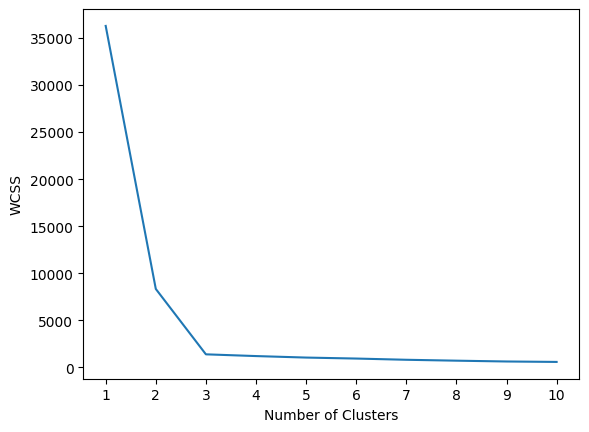

In [ ]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()



1.   **plt.plot(range(1,11), wcss)**


*   Plots the number of clusters (k) on the x-axis (range(1,11)) and the WCSS (Within-Cluster Sum of Squares) on the y-axis.
*   wcss is a list of WCSS values for each k


2.   **plt.xticks(range(1,11))**


*   Ensures that ticks (numbers on the x-axis) are set from 1 to 10, making the graph clearer.







In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')

This line initializes a K-Means clustering model with specific parameters


1.   **n_clusters=3**: The number of clusters (k) to create. Here, we are specifying 3 clusters.
2.   **init='k-means++'**:  A smart way to initialize cluster centers (centroids) for faster convergence.



In [ ]:
y_labels= kmeans.fit_predict(X_train)

This line trains the K-Means model on X_train and simultaneously predicts the cluster assignments for each data point.
kmeans.fit_predict(X_train) performs two operations in one step:

1. **kmeans.fit_predict(X_train)** performs two operations in one step:


  *   **fit(X_train):** Trains the K-Means model on X_train by:
*   Initializing k cluster centroids.
*   Assigning data points to the nearest centroid.
*   Iteratively updating centroids until convergence.


*   **predict(X_train):** Assigns each point in X_train to the closest cluster.








In [ ]:
print(y_labels[:10])

[0 2 0 2 1 2 0 1 2 1]


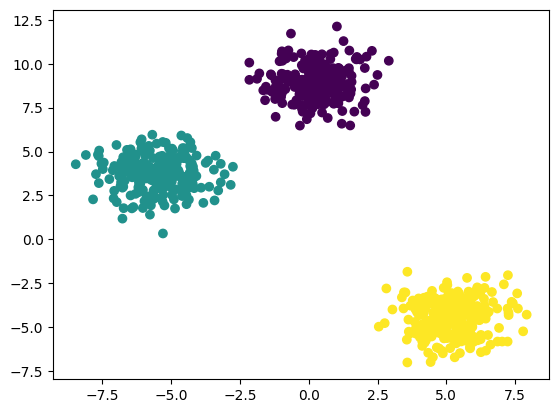

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [ ]:
y_test_labels=kmeans.predict(X_test)

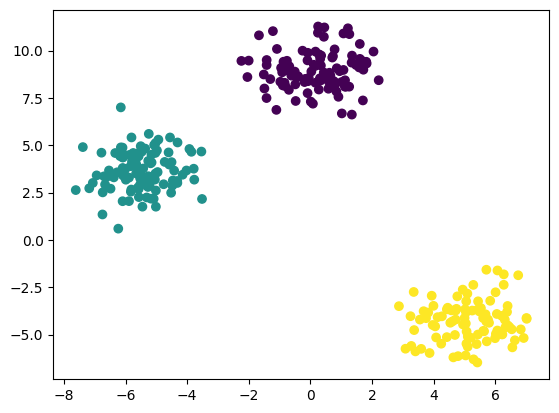

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [ ]:
#Performance matrix
#sihoutte score
from sklearn.metrics import silhouette_score

This line imports the silhouette_score function from sklearn.metrics, which is used to evaluate the quality of clustering results.

In [ ]:
sihoutte_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  sihoutte_coefficients.append(score)


This code calculates the Silhouette Score for different values of k (number of clusters) and stores them in silhouette_coefficients.
1. **Initialize an empty list:** sihoutte_coefficients = []
2. **Loop over different values of k:** for k in range(2, 11):

  *   We start from k=2 because Silhouette Score is undefined for k=1.
  *   The loop runs until k=10, trying different cluster counts.
3. **Train K-Means for each k:** kmeans = KMeans(n_clusters=k, init='k-means++')

  *   Creates a K-Means model with k clusters.
  *   Uses k-means++ initialization for better convergence
4. **Fit the model to training data:** kmeans.fit(X_train)

  *   Finds the k optimal cluster centers.
  *   Assigns each data point to a cluster.

5. **Compute Silhouette Score:** score = silhouette_score(X_train, kmeans.labels_)

  *   Evaluates how well-separated the clusters are.
  *   Uses kmeans.labels_, which contains cluster assignments for each point.

6. **Store the score:** silhouette_coefficients.append(score)

  *   Saves the Silhouette Score for the current k.

In [ ]:
sihoutte_coefficients

[np.float64(0.7271977071483245),
 np.float64(0.8068947097948808),
 np.float64(0.6131965993651695),
 np.float64(0.48525137234988386),
 np.float64(0.48026787829132866),
 np.float64(0.3302497405233491),
 np.float64(0.33672283669988295),
 np.float64(0.3379570400295144),
 np.float64(0.33868685890478467)]

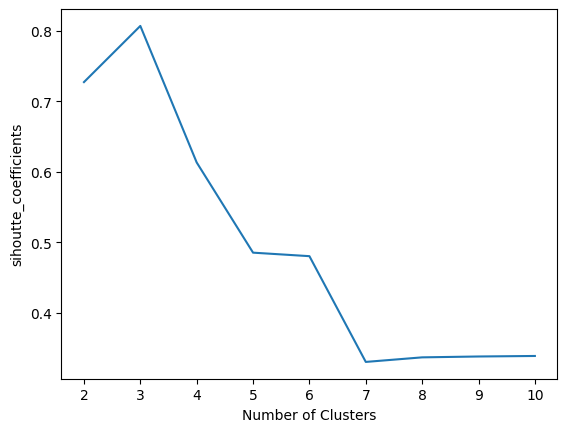

In [ ]:
#plot silhoutte score
plt.plot(range(2,11),sihoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("sihoutte_coefficients")
plt.show()